# Week 5

Phew. You've handed in the assignment. But there's not resting now. We're just hitting out grove, so let's get going!! Much to get through today.

## The plan for today

We continue learning about dataviz by focusing on data with two variables and their relationships. The lecture today has the following parts:
* In part 1, more lecturing on visualization and encodings.
* In part 2, we talk about exploring data with two variables, make some logarithmic plots and think about what we have read in DAOST.
* In part 3, we get a lightning intro to machine learning and the awesome package sklearn
* And finally, in part 4, we use sklearn and have fun with linear regression.

Ok. Now it's time to get started.

In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import math
from math import radians, cos, sin, asin, sqrt
import time
import itertools

from pandas_profiling import ProfileReport
sns.set_theme()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Part 1: More lecturing on dataviz

So now we start learning more about the theory of visualization, digging into data encodings and representations.

[![IMAGE ALT TEXT HERE](https://img.youtube.com/vi/zE6Nr8trdrw/0.jpg)](https://www.youtube.com/watch?v=zE6Nr8trdrw)

*Excercise 1:* Some questions about the video
>
> * Mention 10 examples of ways we can encode data.
> * Are all encodings created equally? Why not? Can you think of an example from the previous lectures?
> * Mention 3 encodings that are difficult for the human eye to parse. Can you find an example of a visualization online that uses one of those three?
> * Explain in your own words: What is the problem with pie-charts?

## Part 2: Exploratory data visualzation, two variables  

I told you how I love the Data Analysis with Open Source Tools book. You had to read Chapter 3, which is about visualizing data with two variables, before coming to class today. If you haven't yet, this is the time to do it! 

*Reading*: DAOST Chapter 3 up to *Graphical Analysis and Presentation Graphics* on page 68 in the PDF. **You will have to go and get it on DTU Learn due to the copyright stuff**.

And now a few exercises to reflect on the text:

*Exercise 2.1:* Questions from DAOST Chapter 3.

> * Looking at Fig 3-1, Janert writes "the data itself shows clearly that the amount of random noise in the data is small". What do you think his argument is?


He meant that there are no clear random deviations from the general curve trend

> * Can you think of a real-world example of a multivariate relationship like the one in Fig 3-3 (lower right panel)?


Most real world problems are multivariate such as the relationship between the type of educational programme a student is in and his/her average score in test, or the weather based on which season we are in. 

> * What are the two methods Janert metions for smoothing noisy data? Can you think of other ones?


Weighted splines and LOESS. They work by approximating data in a small neighborhood by a polynomial of lower order and piece them together to form single smooth curve. Convolution is another method to smooth noisy data, it works by sliding different predefined filter kernels across the noisy data. 

> * What are residuals? Why is it a good idea to plot the residuals of your fit?


The remainder that does not follow the trend of the actual data. It is a good idea to check for the random and independent distribution of residuals.

> * Explain in your own words the point of the smooth tube in figure 3-7.


The smooth tube act as confidence band for the data set from which we can use to identify outliers if lay outside the band.

> * What the h#ll is banking and what part of our visual system does it use to help us see patterns? What are potential problems with banking?


The idea behind banking is to adjust the aspect ratio of the entire plot in such a way that most slopes are at an approximate 45 degree angle. It helps us to zoom in a graph or zoom out to inpect the structure of datapoints.

> * Summarize the discussion of Graphical Analysis and Presentation Graphics on pp. 68-69 in your own words.

Ok. Let's briefly talk about logarithms and logarithimic plots (if you take my networks class in the fall semester you'll se lots of loglog plots since they're important for understanding a key property of networks).

*Exercise 2.2*: Logarithms and logarithmic plots. 

> * First, a couple of questions:
>    * What kind of relationships will a semi-log plot help you discover?


Semi-log plot help us visualise exponential relationships, where vertical axis is in logarithmic scale and the horizontal axis scale is linear. One will be able to see alot more informaiton when there is very wide range of absolute difference between values by showing the relative difference on the logarithmic scale.

>    * What kind of functions will loglog plots help you see?


Power law behaviours

> * Second, we are going to create a version of [this plot](https://github.com/suneman/socialdata2022/blob/main/files/CrimeOccurrencesByCategory.png) from Week 1, where you display the $y$-axis on log-scale. 


In [2]:
df_crime = pd.read_csv('Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv')

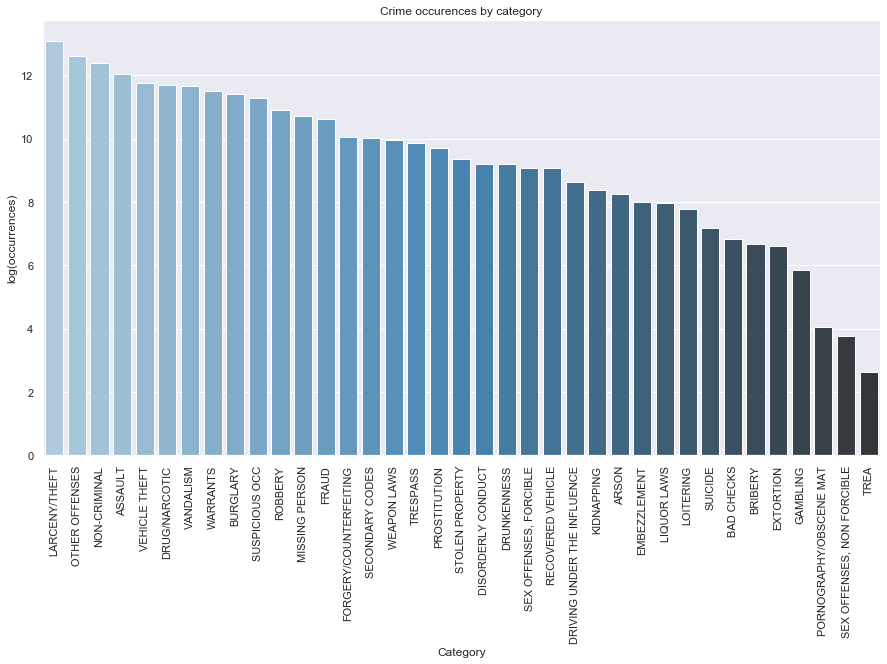

In [3]:
df_cat_occurences = df_crime.groupby('Category').count().rename(columns={'PdId':'Occurences'}).reset_index().sort_values(by='Occurences',ascending=False)
df_cat_occurences['log(occurrences)'] = np.log(df_cat_occurences.Occurences)
plt.figure(figsize = (15,8))
barplot = sns.barplot(x="Category", y="log(occurrences)", data = df_cat_occurences,palette="Blues_d").set_title('Crime occurences by category')
plt.xticks(rotation=90)
plt.show()

> * Third, let's also try a loglog plot. Inspired by [this article](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0183110) I would expect that especially theft could be characterized by a power law distribution also in San Francisco. Let's see if I'm right. 
>   - *Step 1:* Divide San Francisco into a grid **roughly** $100m \times 100m$. You can, for example use numpy to do this, I would call `np.histogram2d`, and searching the internet, it seems that there are also [ways to do this in pandas](https://stackoverflow.com/questions/39254704/pandas-group-bins-of-data-per-longitude-latitude). The earth isn't flat,so `lat,` `lon` aren't really squares, but it is OK to ignore. 
>       * **Hint 1**. I really mean approximately 100 meters. It can also be 200 meters. Or 80 meters. Or 300.
>       * **Hint 2**. Ignore outliers. We only want points that are on the SF peninsula
>       * **Hint 3**. We've made a little example of how you can do the binning. Get it [here](https://github.com/suneman/socialdata2022/blob/main/lectures/Week5_binning.ipynb).


In [4]:
## remove outliers 
data = df_crime[(df_crime.Y < 38) & (df_crime.X <-122)]    

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371*10**3 # Radius of earth in meters. Use 3956 for miles
    d = c*r ## in meters 
    return d                

lat_min = data.Y.min()
lat_max = data.Y.max()
lon_min = data.X.min()
lon_max = data.X.max()
print(f"Estimated bin amount along the western border of San Fransisco: {haversine(lon_min, lat_min, lon_min, lat_max)/100}") 
print(f"Estimated bin amount along the eastern border of San Fransisco: {haversine(lon_max, lat_min, lon_max, lat_max)/100}")
print(f"Estimated bin amount along the northern border of San Fransisco: {haversine(lon_min, lat_max, lon_max, lat_max)/100}")
print(f"Estimated bin amount along the southern border of San Fransisco: {haversine(lon_min, lat_min, lon_max, lat_min)/100}")


Estimated bin amount along the western border of San Fransisco: 125.3631792172115
Estimated bin amount along the eastern border of San Fransisco: 125.3631792172115
Estimated bin amount along the northern border of San Fransisco: 130.78123566673807
Estimated bin amount along the southern border of San Fransisco: 130.9807444161078


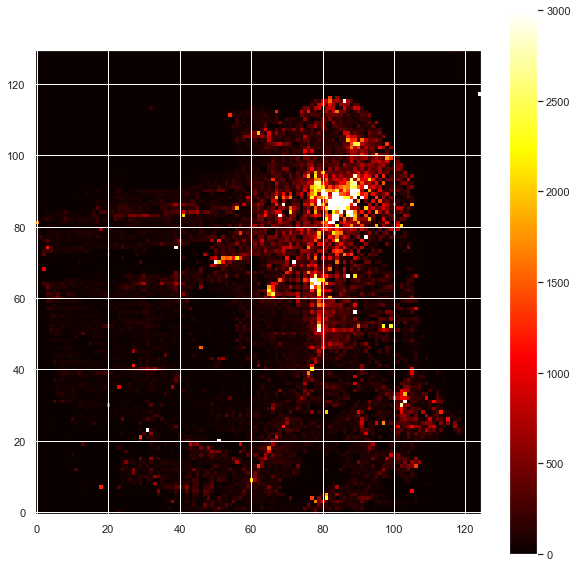

In [5]:
count, lon, lat = np.histogram2d(data.Y, data.X, bins = [130,125])
plt.figure(figsize=(10,10))
plt.imshow(count, cmap='hot',vmax=3000, origin='lower')
plt.colorbar()

>   - *Step 2:* Count the number of thefts occurring within each grid-square (use all data for all time).


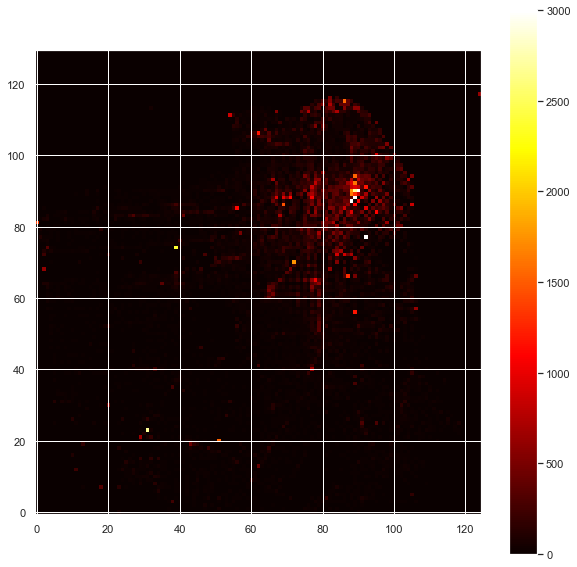

In [6]:
df_theft = data[data['Category'] == 'LARCENY/THEFT']
count, lon, lat = np.histogram2d(df_theft.Y, df_theft.X, bins = [130,125])
plt.figure(figsize=(10,10))
plt.imshow(count, cmap='hot',vmax=3000, origin='lower')
plt.colorbar()

>   - *Step 3:* Tally the counts. Count the number of squares with $k=0$ thefts. We call this $N(0)$. Next, count the number of grids with one crime to get $N(k=1)$. Keep going like this all the way up to $k=C_{max}$, where $C_{max}$ is the highest count of crimes you find in any grid space. 
>     * *Extra tip*: If you want all the details on binning for loglog axes, you can check out [Lecture 2, Part 3](https://github.com/SocialComplexityLab/socialgraphs2021/blob/main/lectures/Week2.ipynb) in my social graphs course.

In [7]:
cmax = np.max(count)
k = []
for i in range(int(cmax)):
    ki = len(np.where(count == i)[0])
    k.append(ki)

>   - *Step 4:* Plot the distribution of $k+1$ vs $N(k)$ on linear axes.


Text(0, 0.5, 'N(k)')

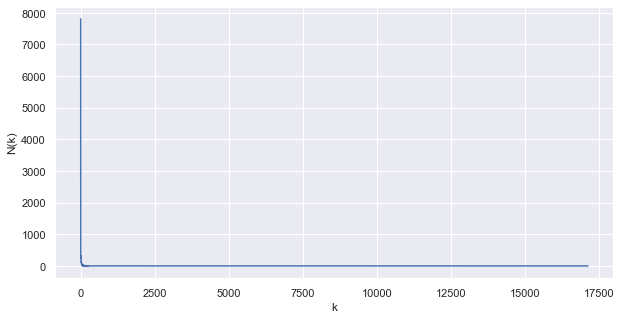

In [8]:
x = np.arange(int(cmax))
y = k
plt.figure(figsize=(10,5))
plt.plot(x,y)
plt.xlabel('k')
plt.ylabel('N(k)')


>   - *Step 5:* Plot the distribution of $k+1$ vs $N(k)$ on loglog axes.


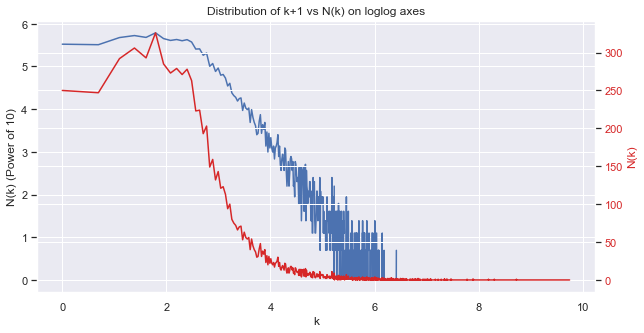

In [9]:
fig,ax = plt.subplots(figsize=(10,5))
ax.plot(np.log(x),np.log(y))
ax.set_xlabel('k')
ax.set_ylabel('N(k) (Power of 10)')
ax2 = ax.twinx()
ax2.plot(np.log(x),y,color = 'tab:red')
ax2.set_ylabel("N(k)",color = 'tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')
ax.set_title('Distribution of k+1 vs N(k) on loglog axes')
plt.show()


>   - *Step 6:* Answer the question. Was Sune correct in assuming that there is a power-law distribution of theft?

No, as plotting the theft counts against number of theft occurenes in the loglog scale does not show a linear relationship between the two quantities. Thus the data does not follow a power law distribution. 

## Part 3: Lightning intro to Machine Learning and sklearn

Before we get to linear regression and as we are going to use a bit of Machine Learning in the following lectures too, we are going to have a quick intro to Machine Learning.

We kick off the machine-learning part by watching a video lecture on *What Machine Learning is*. The lecture (and the one in next weeks) have been prepared by our very own expert, Ole Winter, whose work focuses on Machine Learning. The lectures + slides have been prepared especially for you guys by Ole, and lovingly edited by Sune.

**What is machine learning?**
[![IMAGE ALT TEXT HERE](https://img.youtube.com/vi/SsCYF9tDY9Y/0.jpg)](https://www.youtube.com/watch?v=SsCYF9tDY9Y)

*Exercise 3.1* We now tie everything together (video, DAOST etc.) by answering a few questions:
> 
> * What are the different categories of Machine Learning? Where does linear regression fall in?


There are supervised, unsupervised machine learning and reinforcement learning. Linear regression falls into the category of supervised learning. 

> * What is the difference between Machine Learning and Statistics? How does this idea connect to the purpose of linear regression according to Janert (DAOST Ch. 3)?


Statistics summarises data whereas machine leanring aims to find patterns within data.

> * I think figure 3-14 (DAOST Ch. 3) makes an important point about linear fits that is rarely made. What is it? 


Linear fits do not have unique best description of the data.

> * What is problematic about using straight lines to fit the data in Fig 3-5? (Something similar is actually the topic of a *Nature* article from 2004 get it [here](https://github.com/suneman/socialdata2022/blob/main/files/regrunners.pdf). And an extra [link](http://www2.imm.dtu.dk/pubdb/views/edoc_download.php/3366/pdf/imm3366.pdf) on this topic for the students who know Danish).

We could easily be obessed with fitting straight lines with given datapoints, overlooking confounding variables or in general the actual contextual background information such as law of physics or simply common sense. 

Ok, but how do we apply different machine learning models in practice? 

The amazing package `sklearn` is state-of-the-art machine learning for Python. It's used in companies big and small all over the world and in lots of academic papers.

Today, we start with a high level overview presented in [this tutorial](https://scikit-learn.org/stable/tutorial/basic/tutorial.html). **Try it out**: Read/work through the first three sections (*Machine learning: the problem setting*, *Loading an example dataset*, *Learning and predicting*) to get a sense of data types and syntax.

*Exercise 3.2*: Did you read the text?
>
> * Describe in your own words how data is organized in `sklearn` (how does a *dataset* work according to the tutorial)?


> * What is the dimensionality of the `.data` part of a dataset and what is the size of each dimension?

## Part 4: Linear Regression

So, now it's time for fun with standard linear regression! We'll get into that by asking the following question. 

> *Which pair of focus crimes have the the most similar temporal pattern across the week? (And which pair is most dissimilar).*

Below I list the focus-crimes for your convenience

In [10]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])
df_focus = df_crime[df_crime['Category'].isin(focuscrimes)]

One way to answer this question is to plot the activity for all pairs of crimetypes as scatter plot per pair. One crime type on each axis, and where each point in the scatter corresponds to an hour of the week, and the number of crimes of crime-type 1 is on the $x$-axis and the number of crimes of crime-type 2 is on the $y$-axis. (So there will be 168 points in each scatterplot.) If we look at 14 focus crimes that results in 91 pairwise comparisons. 

*Exercise 4.1*: Create the 91 scatterplots.
> * Display the plots in a $7$ by $13$ subplot matrix. You can use matplotlib's `subplot` to organize those plots. With $7$ across and $13$ down, you should be able to squeeze them all onto a single [a4](https://en.wikipedia.org/wiki/ISO_216#A_series) page.
>     * Make sure to label each one with the two crime-types you're comparing so we can easily inspect visually.
>     * Make sure that that you squeeze the subplots closely together so each plot can be as big as possible. 


In [11]:
df_focus['Hour'] = pd.DatetimeIndex(df_focus['Time']).hour 
temp = df_focus.groupby(['Category','Hour','DayOfWeek']).count().rename(columns = {'PdId':'Occurences'}).reset_index()

In [13]:
df_scatter = pd.DataFrame(columns=focuscrimes)
for crime in focuscrimes:
    counts = list(temp[temp['Category'] == crime].Occurences)
    df_scatter[crime] = counts

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000178F3B2A8C8>,
      dtype=object)

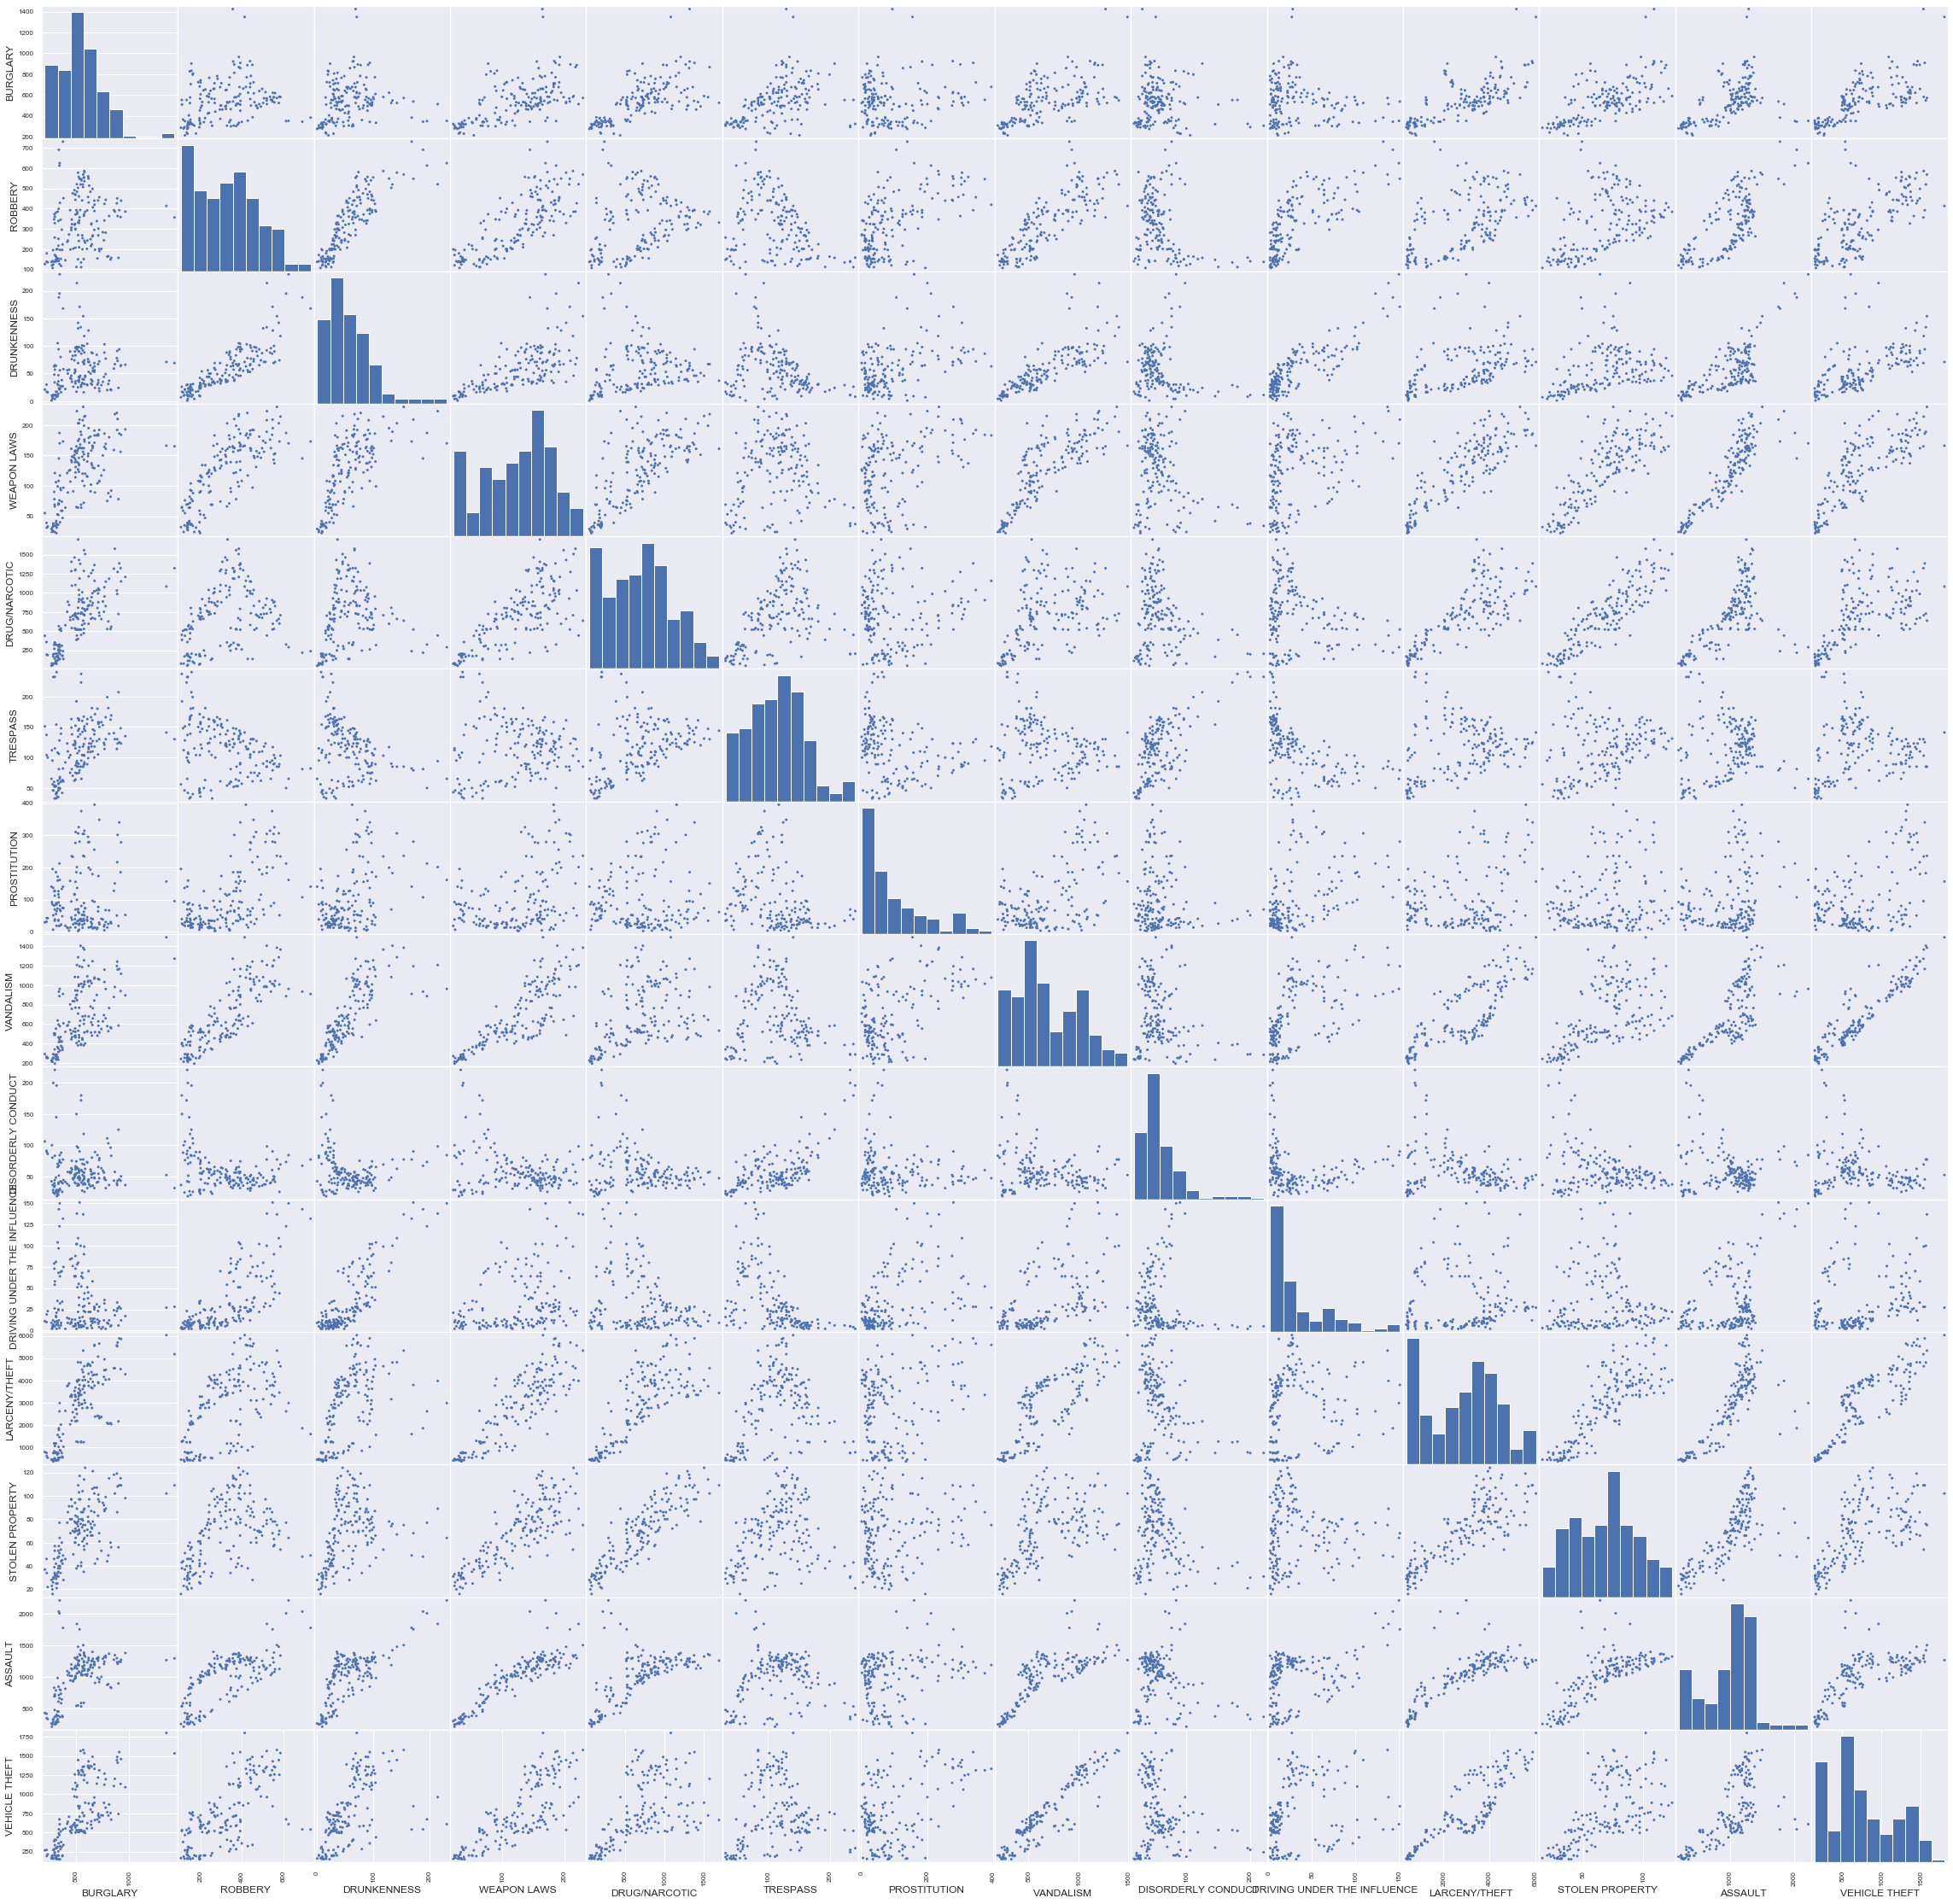

In [14]:
pd.plotting.scatter_matrix(df_scatter, alpha=1,figsize = (40,40))

> * Just inspecting this matrix, which crime-types look correlated and which one look like they're very different?

---

Next it's time for the linear regression. Janert writes about this on page 63-66. 

There is a closed-form solution for linear regression. If you want to find the best straight line $y = ax + b$ fit to a set of $N$ points $\{(x_1,y_1), (x_2,y_2), \ldots (x_N,y_N)\}$, the value of $b$ is

$$
\tag{1}
b = \langle y \rangle - a \langle x \rangle,
$$

where $\langle x \rangle = (1/N)\sum_i x_i$ is the mean value of the $x_i$ and $\langle y \rangle = (1/N)\sum_i x_i$ is the mean value of the $y_i$. 

And the value for the slope $a$ is 

$$
\tag{2}
a = \frac{\sum_{i=1}^N \left( x_iy_i \right) - N \langle x\rangle\langle y\rangle }{\sum_{i=1}^N\left( x_i^2 \right) - N\langle x\rangle^2}.
$$


A couple of years ago, Sune actually derived the whole thing. I've taken it out of the notebook. But if you'd like to take a look (it's a fun and instructive little exercise), you can find it **[here](https://github.com/suneman/socialdata2021/blob/main/lectures/LinearRegressionDerived.ipynb)**. 

We are going to focus on the fit for now, but keep in mind what we have learnt so far about the purpose of linear regression! 



*Exercise 4.2:* Linear regression using sklearn.
>
> * Using [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) from `sklearn`, compute the slope and intercept for each couple of focus-crimes (from Ex. 4.1) and add a linear fit to each of the 91 scatterplots above.


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [15]:
import itertools
combs = list(itertools.combinations(focuscrimes, 2))

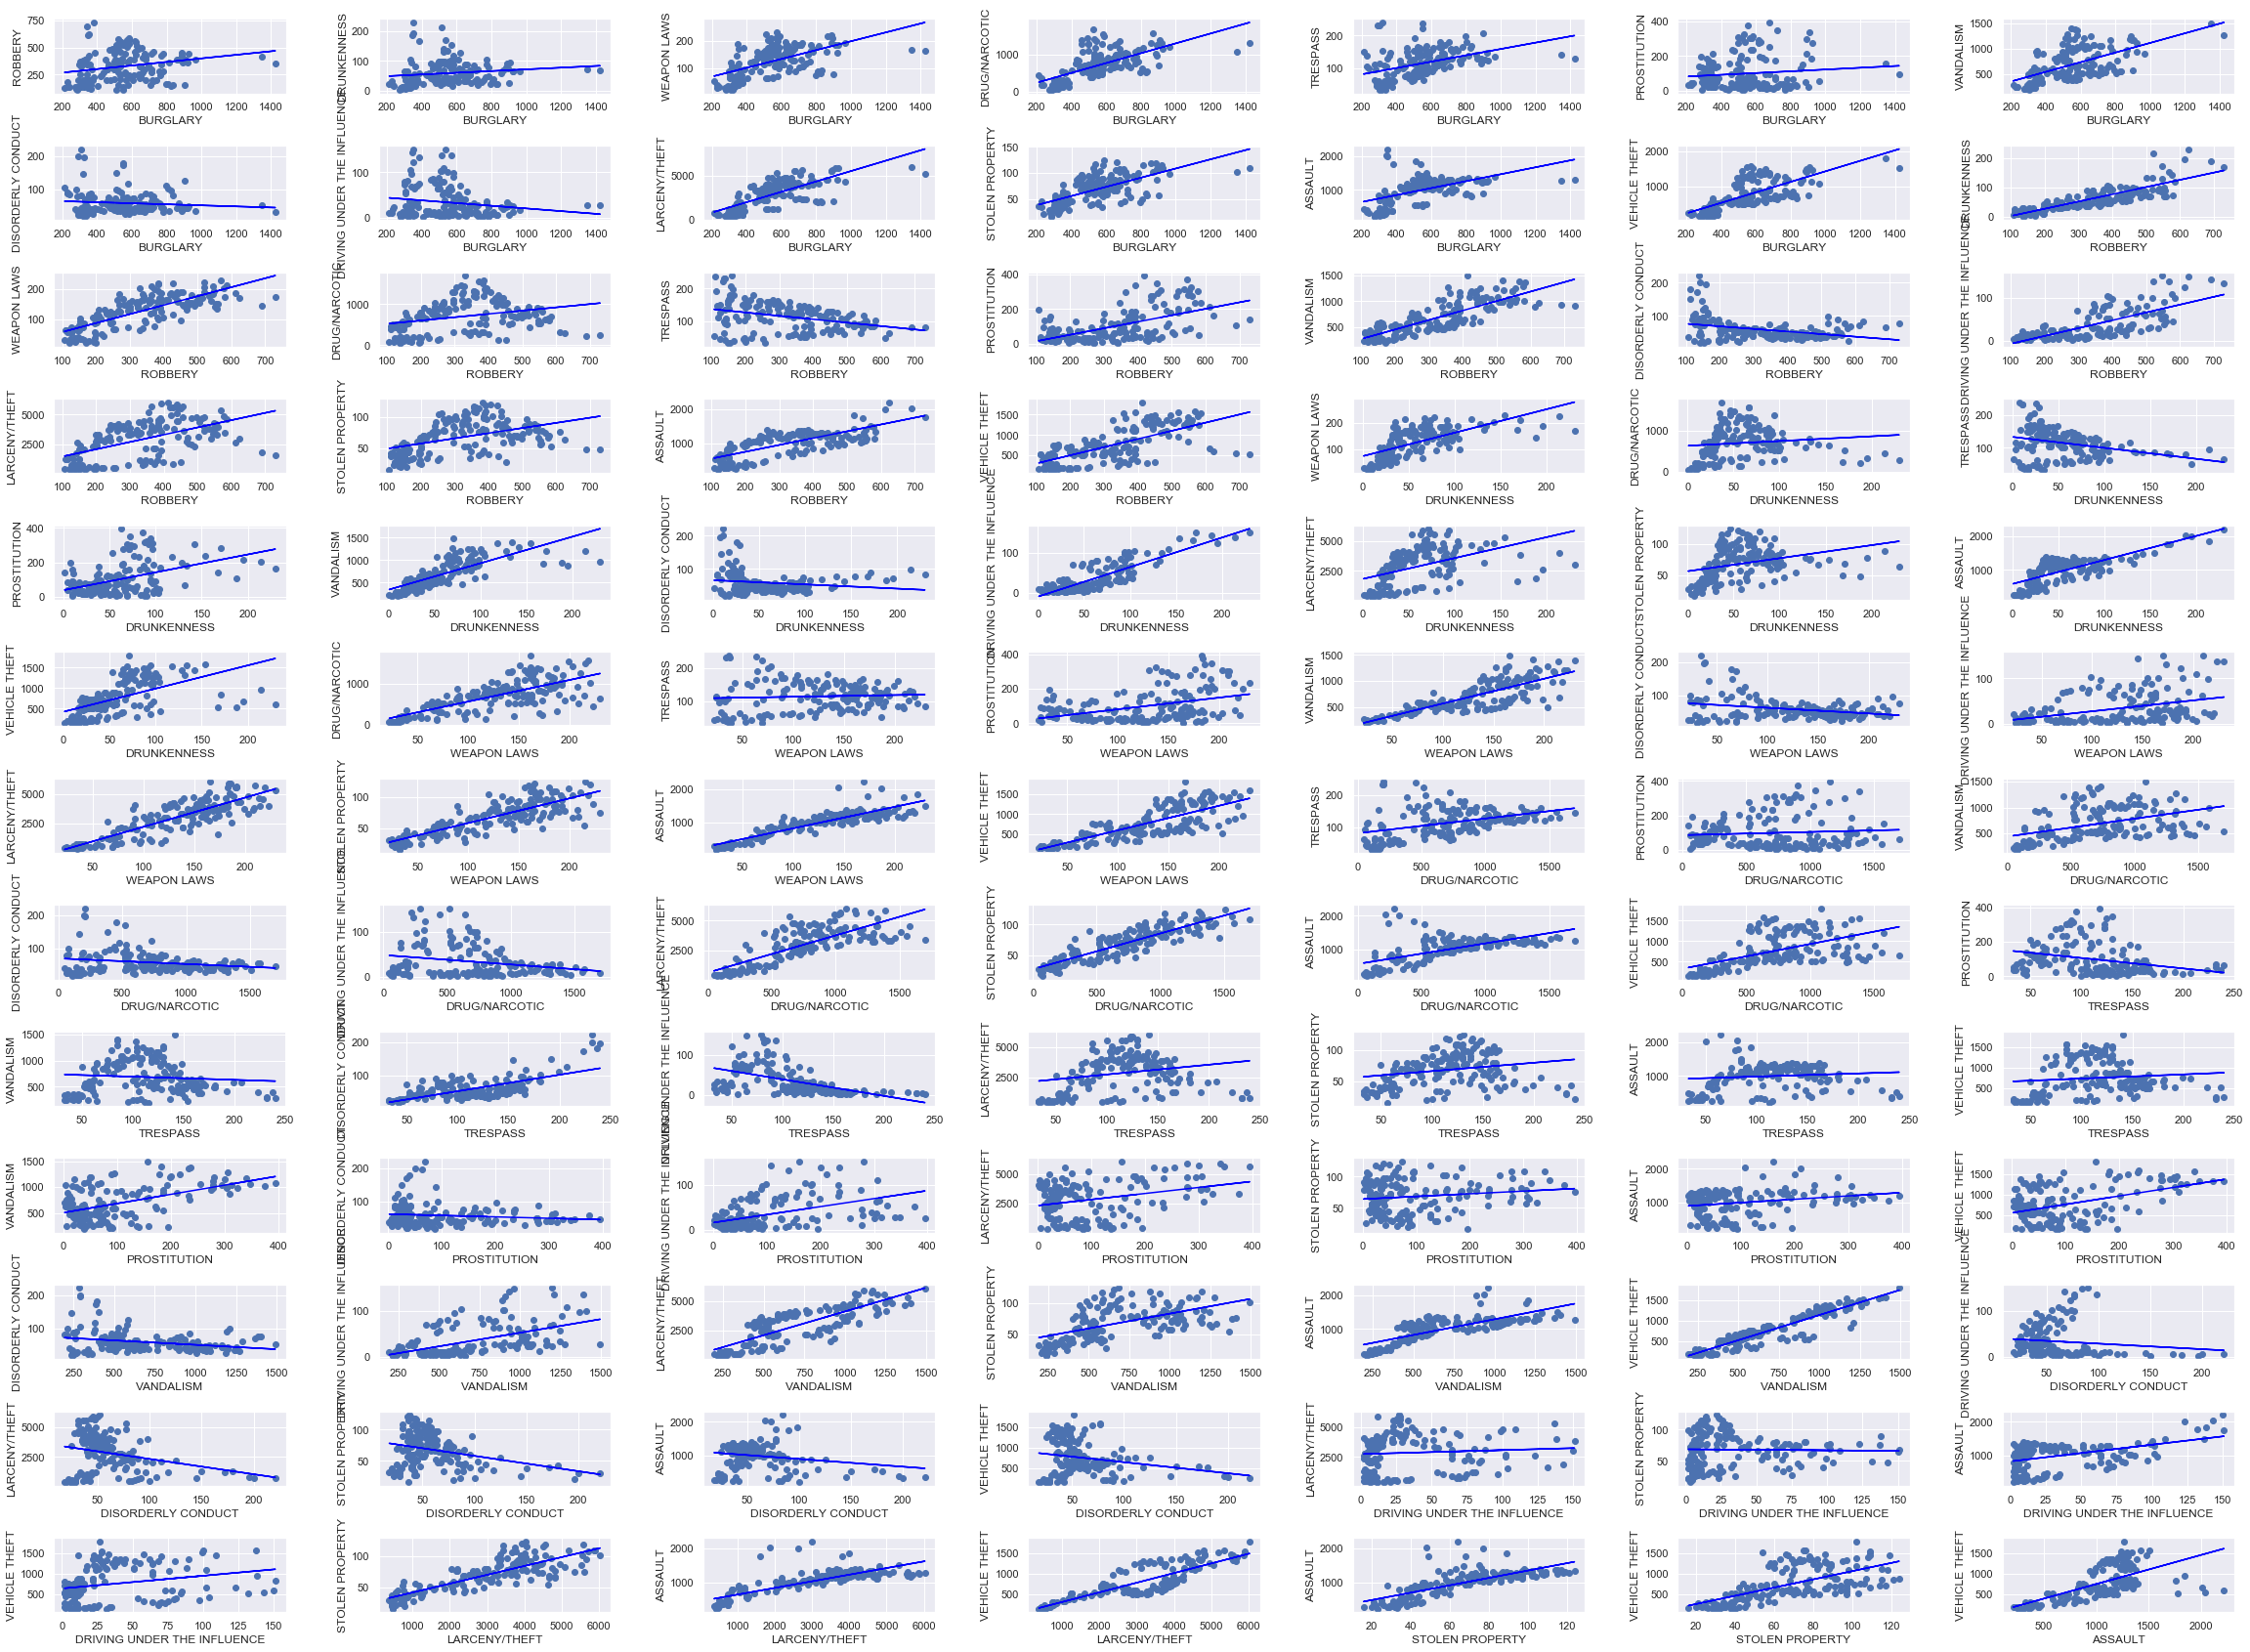

In [20]:
fig = plt.figure(figsize=(40,30))
fig.subplots_adjust(hspace=0.7, wspace=0.4)
i = 1
for a,b in enumerate(combs):
    X = df_scatter[b[0]].values.reshape(-1,1)
    y = df_scatter[b[1]].values.reshape(-1,1)
    # Create linear regression object
    lm = LinearRegression().fit(X,y)
    intercept = lm.intercept_
    slope = lm.coef_
    y_pre = lm.predict(X)


    ax = fig.add_subplot(13, 7, i)
    ax.scatter(X,y)
    ax.plot(X,y_pre,color='blue')
    ax.set_xlabel(b[0])
    ax.set_ylabel(b[1])
    i += 1

> * **(Optional but highly recommended)** Using the formulas we derived above (Equation 1 and 2), calculate the slopes for $a$ and $b$ in each case. Compare the results with the ones obtained with sklearn to check that everything is working as expected.


> * **(Optional)** You can add even more information to this plot by coloring each point according to its hour of the week. So create a gradient going from one color to another, and color each point according to the gradient. (So let's say your two colors are red and blue, then the Sunday, midnight to 1am bin will be red and the following Sunday, 11pm - midnight bin will be blue).

---

But the question we started with was "Which pair of focus crimes have the the most similar temporal pattern across the week?". We haven't really answered that yet. So let's calculate one last thing: $R^2$. You probably also remember this one. 

Basically $R^2$ is a measures of how good a linear fit is. You can [read about $R^2$ on wikipedia](https://en.wikipedia.org/wiki/Coefficient_of_determination). 



*Exercise 4.3:* Goodness of fit as a measure of correlation. 
> * Write a little function to calculate $R^2$ alongside each linear fit, and compare it with the one provided by the function `score()` in `sklearn`.


In [34]:
scores_sk = {key:[] for key in combs}

In [36]:
def scoreR2(y,f):
    ybar = np.mean(y)
    ss_res = np.sum((y-f)**2)
    ss_tot = np.sum((y-ybar)**2)
    R2 = 1-ss_res/ss_tot
    return R2

scores_sk = {key:[] for key in combs}
scores_own = {key:[] for key in combs}
for a,b in enumerate(combs):
    X = df_scatter[b[0]].values.reshape(-1,1)
    y = df_scatter[b[1]].values.reshape(-1,1)
    # Create linear regression object
    lm = LinearRegression().fit(X,y)
    intercept = lm.intercept_
    slope = lm.coef_
    y_pre = lm.predict(X)

    scores_sk[b].append(lm.score(X,y))
    scores_own[b].append(scoreR2(y,y_pre))
    print('sklearn score: ', lm.score(X,y))
    print('Own function', scoreR2(y,y_pre) )

sklearn score:  0.05122102914956583
Own function 0.05122102914956583
sklearn score:  0.019030840901122836
Own function 0.019030840901122836
sklearn score:  0.3338198085994367
Own function 0.3338198085994367
sklearn score:  0.4417299878417374
Own function 0.44172998784173745
sklearn score:  0.18677088190410185
Own function 0.18677088190410185
sklearn score:  0.011610754738799358
Own function 0.011610754738799356
sklearn score:  0.34480311052861334
Own function 0.34480311052861334
sklearn score:  0.008869003915297324
Own function 0.008869003915297324
sklearn score:  0.027384776826128387
Own function 0.027384776826128387
sklearn score:  0.5505183095576354
Own function 0.5505183095576354
sklearn score:  0.43585915292870725
Own function 0.43585915292870725
sklearn score:  0.2703690667450356
Own function 0.2703690667450356
sklearn score:  0.49456516113884175
Own function 0.49456516113884175
sklearn score:  0.722579070691617
Own function 0.722579070691617
sklearn score:  0.6003302362003575
Ow

> * **According to the fits and associated $R^2$**, which pair of crimes have the **most similar** temporal pattern. Discuss your finding: Does it make sense? Why?/Why not?


In [39]:
max_key = max(scores_sk, key=scores_sk.get)
max_key

('VANDALISM', 'VEHICLE THEFT')

> * According to your fits and associated measure of $R^2$, which pair of crimes have the **most dissimilar** temporal pattern. Discuss your finding: Does it make sense? Why?/Why not?


In [40]:
min_key = min(scores_sk, key=scores_sk.get)
min_key

('DRIVING UNDER THE INFLUENCE', 'STOLEN PROPERTY')

> * Explain the connection between $R^2$ and the [Pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient).

The Pearson correlation coefficient (r) is used to identify patterns in things (strength of correlation) whereas the coefficient of determination (R²) is used to identify the strength of a model.